# Data Story Telling, Exploratory Data Analysis & Inferential Statistics
# _Factors affecting vessel delays at US Army Corps of Engineers-managed locks on US waterways._

## Springboard Data Science Career Track, Capstone 2
***
* Author: Heather A. Passmore
* Data: United States Army Corps of Engineers, Lock Performance Management System
* Capstone Description: Project Proposal (add link)
* Initial Data Approach: Data Wrangling (create, add link)
***
## Table of Contents
1. Import Merged Dataframes & Check Descriptive Statistics
2. Define Delay & Explore Patterns 
3. Examine delays per lock & per day
4. Heading

## 1. Import Merged Dataframes & Check Descriptive Statistics

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle
import scipy.stats
from scipy.stats import norm
import scipy as sp

# Figures inline, visualization style
%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
# Bring traf_sample dataframe into workspace: random sample ~ 2000 rows per lock over 5 years
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/traffic_5yr_sample.pickle','rb') as f:
    traf_sample = pickle.load(f)

In [3]:
# Bring barge_flot_vessel dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/barge_flot_vessel.pickle','rb') as f:
    barge_flot_vessel = pickle.load(f)

In [4]:
# Bring stall_stop_2013_2017_descriptors dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/stall_stop_2013_2017_descriptors.pickle','rb') as f:
    stoppage_descriptors = pickle.load(f)

In [5]:
# Read rivermstr csv for river_names
rivermstr = pd.read_csv('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/RIVERMSTR.csv', 
                    index_col=None, header = 0)

In [6]:
# check the summary statistics of numerical fields in subsampled traffic table
traf_sample.describe()

LOCK_NO       CHMBR_NO     VESSEL_NO  NUM_CMRCL_PASSGRS  \
count  392000.000000  392000.000000  3.920000e+05       54260.000000   
mean       20.397120       1.292842  1.783938e+09          19.514965   
std        22.160452       0.801119  1.356117e+09          78.109511   
min         1.000000       1.000000  4.300830e+05           0.000000   
25%         4.000000       1.000000  4.358892e+08           0.000000   
50%        12.000000       1.000000  1.649363e+09           2.000000   
75%        26.000000       1.000000  2.996234e+09           9.000000   
max        99.000000       5.000000  4.293307e+09        5140.000000   

         LINE_SEQ_NO     entry_time      exit_time     delay_time  
count  392000.000000  281459.000000  281561.000000  392000.000000  
mean   499870.883867       8.858892      11.049684     108.612217  
std    287824.347127       8.172415      22.143275     657.296516  
min         3.000000       1.000000       1.000000       0.000000  
25%    250233.750000       3.000000       4.000000       0.000000  
50%    501994.500000       7.000000       8.000000       5.000000  
75%    745255.250000      12.000000      15.000000      64.000000  
max    999995.000000    1090.000000    4325.000000   87870.000000

In [7]:
# Remove all 'delay_time' = 0 rows: no_zero_delay
no_zero_delay = traf_sample.query('delay_time != 0')

In [8]:
no_zero_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252781 entries, 2093451 to 488481
Data columns (total 23 columns):
EROC                    252781 non-null object
RIVER_CODE              252781 non-null object
LOCK_NO                 252781 non-null int64
CHMBR_NO                252781 non-null int64
OPS_ID                  252781 non-null object
LOCKAGE_TYPE            252781 non-null object
VESSEL_NO               252781 non-null int64
VESSEL_FUNCTION_TYPE    252564 non-null object
FLOTILLA_NO             188928 non-null object
ARRIVAL_DATE            252781 non-null datetime64[ns]
SOL_DATE                252781 non-null datetime64[ns]
BOW_OVER_SILL           182840 non-null datetime64[ns]
END_OF_ENTRY            182861 non-null datetime64[ns]
START_OF_EXIT           182865 non-null datetime64[ns]
END_OF_LOCKAGE          252781 non-null datetime64[ns]
NUM_CMRCL_PASSGRS       24206 non-null float64
ASST_CODE               17453 non-null object
SIGNAL_DATE             813 non-null dat

In [9]:
# check the summary statistics of numerical fields in subsampled traffic table
no_zero_delay.describe()

LOCK_NO       CHMBR_NO     VESSEL_NO  NUM_CMRCL_PASSGRS  \
count  252781.000000  252781.000000  2.527810e+05       24206.000000   
mean       18.281390       1.255941  1.950238e+09          32.702884   
std        21.134229       0.749001  1.303500e+09          96.405534   
min         1.000000       1.000000  4.300830e+05           0.000000   
25%         3.000000       1.000000  8.464360e+08           0.000000   
50%        11.000000       1.000000  1.852857e+09           3.000000   
75%        23.000000       1.000000  3.105937e+09          40.000000   
max        99.000000       5.000000  4.293307e+09        5140.000000   

         LINE_SEQ_NO     entry_time      exit_time     delay_time  
count  252781.000000  182824.000000  182865.000000  252781.000000  
mean   500462.305632       8.317201      11.510984     168.430337  
std    287793.577511       7.815966      19.916673     812.348147  
min         3.000000       1.000000       1.000000       1.000000  
25%    250571.000000       3.000000       4.000000       7.000000  
50%    502734.000000       6.000000       8.000000      35.000000  
75%    746070.000000      12.000000      15.000000     109.000000  
max    999995.000000    1090.000000    4325.000000   87870.000000

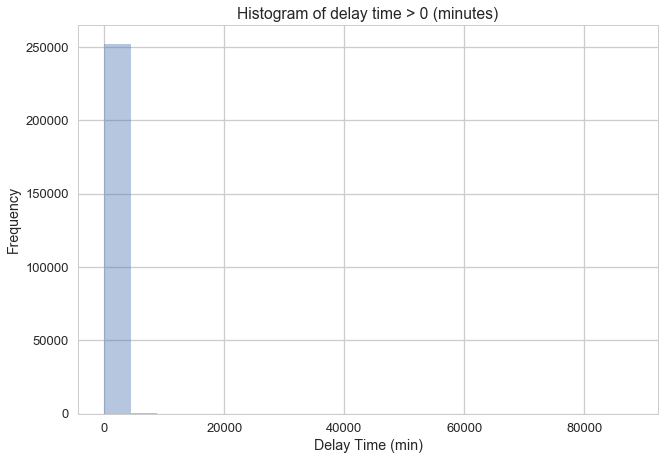

In [10]:
# view a histogram of delay_time with no 'delay_time' = 0
sns.distplot(no_zero_delay.delay_time, bins=20, kde=False, rug=False);
plt.title('Histogram of delay time > 0 (minutes)');
plt.xlabel('Delay Time (min)');
plt.ylabel('Frequency');

In [11]:
# Log transform 'delay_time' to view all data on histogram (raw data too skewed)
no_zero_delay = no_zero_delay.assign(log_delay = lambda x: np.log(x.delay_time))

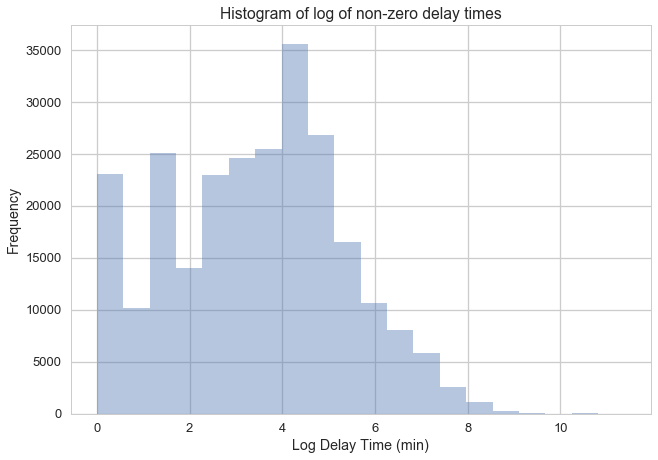

In [12]:
# view a histogram of log of delay_time
sns.distplot(no_zero_delay.log_delay, bins=20, kde=False, rug=False);
plt.title('Histogram of log of non-zero delay times');
plt.xlabel('Log Delay Time (min)');
plt.ylabel('Frequency');

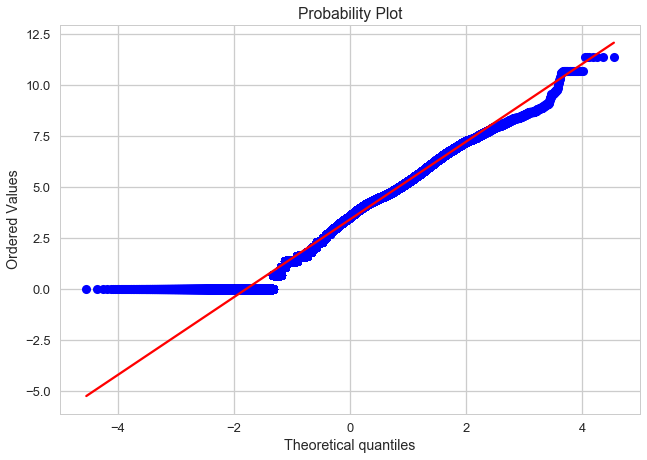

In [13]:
# check normality with Q-Q plot
scipy.stats.probplot(no_zero_delay.log_delay, dist='norm', fit=True, plot=plt);

## 2. Define Delay & Explore Patterns

In [14]:
# Define Delay: Based on the 75th percentile (not including zero delay times) delay > 110 minutes
traf_sample['delay'] = traf_sample['delay_time'].apply(lambda x: x > 110)

In [15]:
# Look at dataframe
traf_sample.head()

EROC RIVER_CODE  LOCK_NO  CHMBR_NO    OPS_ID LOCKAGE_TYPE   VESSEL_NO  \
2093451   H2         OH       75         2  L5608584            S  2246973225   
5791      M5         MK       22         1  L7532719            C   967995540   
1234536   M3         GI       14         1  L6150873            O  3171419219   
1391794   H4         MN       25         1  L6581479            S  2064406338   
638365    M3         GI       13         1  L7255211            O  1088709797   

        VESSEL_FUNCTION_TYPE FLOTILLA_NO        ARRIVAL_DATE  ...    \
2093451                    T    L3435504 2014-05-07 05:37:00  ...     
5791                       T    L4611089 2017-04-06 00:40:00  ...     
1234536                    T    L3767838 2015-02-10 20:00:00  ...     
1391794                    T    L4017674 2015-09-20 02:20:00  ...     
638365                     T    L4420842 2016-10-01 01:08:00  ...     

             END_OF_LOCKAGE NUM_CMRCL_PASSGRS ASST_CODE SIGNAL_DATE  \
2093451 2014-05-07 06:44:00               NaN       NaN         NaT   
5791    2017-04-06 01:43:00               NaN       NaN         NaT   
1234536 2015-02-10 21:07:00               NaN       NaN         NaT   
1391794 2015-09-20 03:15:00               NaN       NaN         NaT   
638365  2016-10-01 02:16:00               NaN       NaN         NaT   

        DEPARTURE_DATE  LINE_SEQ_NO entry_time exit_time delay_time  delay  
2093451            NaT       821558       10.0      14.0       10.0  False  
5791               NaT       912730       30.0       8.0        0.0  False  
1234536            NaT       838438        NaN       NaN       66.0  False  
1391794            NaT       362970       10.0       5.0       20.0  False  
638365             NaT       810510        NaN       NaN       67.0  False  

[5 rows x 24 columns]

In [16]:
# count number of delays
traf_sample['delay'].value_counts()

False    329597
True      62403
Name: delay, dtype: int64

In [17]:
# calculate percent of lock delays
no_delay = traf_sample['delay'].value_counts()[0] # first value of the result above
delays = traf_sample['delay'].value_counts()[1] # second value of the result above
total_lockage = no_delay + delays # total count of lockage events
print('Overall proportion of vessels delayed', float(delays) / total_lockage) # converting to float to get a float result

Overall proportion of vessels delayed 0.159191326531


In [18]:
# groupby EROC to see counts by Engineer Reporting Office Code (Corps division & district)
group_by_EROC = traf_sample.groupby(['EROC','delay'])

In [19]:
# group categories by size and unstack by EROC
count_delays_by_eroc = group_by_EROC.size().unstack()

In [20]:
# calculate proportion of lockage events that are 'delays' (>110min)
prop_by_EROC = pd.DataFrame(traf_sample.groupby('EROC')['delay'].apply(lambda x: np.sum(x)/len(x)))

In [21]:
# Join count_delays_by_eroc with prop_by_EROC
count_prop_EROC = count_delays_by_eroc.join(prop_by_EROC)
count_prop_EROC

False   True     delay
EROC                        
B2    48636  17342  0.262845
B3     9235   5470  0.371982
B4     4715     46  0.009662
B5    34474  13113  0.275558
B6    22069   1515  0.064238
E3     1532      8  0.005195
E4     3427     10  0.002910
G2     3660     82  0.021913
G3     9215     37  0.003999
G4     3303      9  0.002717
H1    16888   2716  0.138543
H2    29622   4955  0.143303
H3    12292   5061  0.291650
H4    35480   3096  0.080257
H5     1030      2  0.001938
H6    10516      5  0.000475
H7     7618    110  0.014234
K3    16798     68  0.004032
K5    18668    138  0.007338
K7       11      1  0.083333
M3    24490   7665  0.238377
M4    12252    302  0.024056
M5     3666    652  0.150996

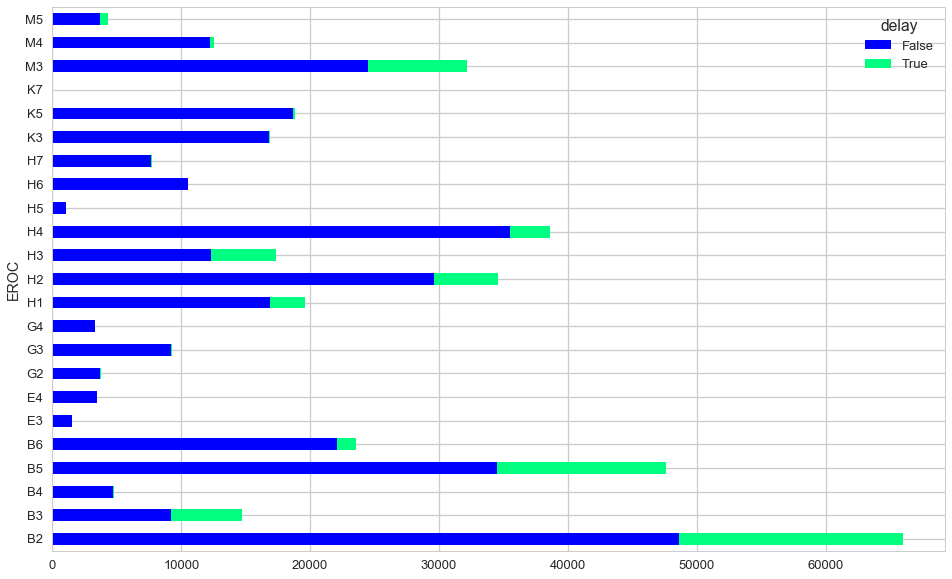

In [22]:
# Plot delay/no delay by EROC
count_delays_by_eroc.plot(kind='barh', stacked=True, figsize=[16,10], colormap='winter')

In [23]:
# groupby River_Code to get counts by River
group_by_river = traf_sample.groupby(['RIVER_CODE','delay'])

In [24]:
# view categories by size and unstack by RIVER_CODE
count_delays_by_river = group_by_river.size().unstack()

In [25]:
# calculate proportion of lockage events by river that are 'delays' (>110min)
prop_by_river = pd.DataFrame(traf_sample.groupby('RIVER_CODE')['delay'].apply(lambda x: np.sum(x)/len(x)))

In [26]:
# set index of rivermstr to river_code
rivers = rivermstr.set_index('RIVER_CODE')

# Join rivers with count_delays_by_river to provide river names
delays_rivername = rivers.join(count_delays_by_river)

# Join delays_rivername with prop_by_river, view highest proportion of delays first
count_prop_river = delays_rivername.join(prop_by_river)
count_prop_river.sort_values(by=['delay'], ascending=False, inplace=True, )
count_prop_river

RIVER_NAME    False     True     delay
RIVER_CODE                                                            
TN                         TENNESSEE RIVER   9002.0   4523.0  0.334418
GI              GULF INTRACOASTAL WATERWAY  58551.0  24942.0  0.298732
IL                       ILLINOIS WATERWAY  14748.0   4724.0  0.242605
MI                       MISSISSIPPI RIVER  50277.0  15374.0  0.234178
OH                              OHIO RIVER  56797.0   9872.0  0.148075
CU                        CUMBERLAND RIVER   3290.0    538.0  0.140543
KA                           KANAWHA RIVER   3078.0    471.0  0.132713
FR                         CAPE FEAR RIVER     11.0      1.0  0.083333
MK            MC-KERR ARKANSAS RIV NAV SYS  15918.0    954.0  0.056543
OB               OUACHITA and BLACK RIVERS   1017.0     43.0  0.040566
SM                         ST. MARYS RIVER   4020.0    110.0  0.026634
MN                       MONONGAHELA RIVER  14119.0    376.0  0.025940
OD                               OLD RIVER   2094.0     53.0  0.024686
CO                          COLUMBIA RIVER   4682.0     85.0  0.017831
BW           BLACKWARRIOR/TOMBIGBEE RIVERS   5932.0     80.0  0.013307
AG                         ALLEGHENY RIVER   5417.0     45.0  0.008239
AP          APLCHCLA/CHATTAHO/FLINT RIVERS    130.0      1.0  0.007634
AL                    ALABAMA-COOSA RIVERS    131.0      1.0  0.007576
HU                            HUDSON RIVER   1532.0      8.0  0.005195
CN                        CANAVERAL HARBOR   4567.0     23.0  0.005011
TT            TENNESSEE TOMBIGBEE WATERWAY  12475.0     56.0  0.004469
WS              LAKE WASHINGTON SHIP CANAL   9215.0     37.0  0.003999
OK                     OKEECHOBEE WATERWAY  12231.0     45.0  0.003666
AI          ATLANTIC INTRACOASTAL WATERWAY   2689.0      8.0  0.002966
DS                DISMAL SWAMP CANAL ROUTE    738.0      2.0  0.002703
SN                             SNAKE RIVER   2281.0      6.0  0.002624
CA                         CALCASIEU RIVER   2743.0      7.0  0.002545
BR          BLACK ROCK CH/TONAWANDA HARBOR   1030.0      2.0  0.001938
GB                   GREEN & BARREN RIVERS   2579.0      3.0  0.001162
AT                       ATCHAFALAYA RIVER   1878.0      2.0  0.001064
RR                               RED RIVER   3698.0      3.0  0.000811
CH                           CHICAGO RIVER  10516.0      5.0  0.000475
FB                        FRESHWATER BAYOU   7860.0      3.0  0.000382
IN                        THE INLAND ROUTE   3598.0      NaN  0.000000
KS                         KASKASKIA RIVER    753.0      NaN  0.000000
BT                             BAYOU TECHE      NaN      NaN       NaN
CI                            CLINCH RIVER      NaN      NaN       NaN
WI                        WILLAMETTE RIVER      NaN      NaN       NaN
00                                    NONE      NaN      NaN       NaN

In [27]:
# groupby LOCKAGE_TYPE to see counts by LOCKAGE_TYPE
group_by_LOCKAGE = traf_sample.groupby(['LOCKAGE_TYPE','delay'])

In [28]:
# view categories by size and unstack by LOCKAGE_TYPE
# A = Barges After Tow, B = Barges Before Tow, C = Consecutive, F = Fast Double
# J = Jacknife, K = Knockout, N = Navigable Pass, O = Open Pass, S = Straight
# T = Barge Transfer, V = Setover, Z = other
count_delays_by_lockage = group_by_LOCKAGE.size().unstack()

In [29]:
# calculate percent of lockage events that are 'delays' (>110min)
prop_by_lockage = pd.DataFrame(traf_sample.groupby('LOCKAGE_TYPE')['delay'].apply(lambda x: np.sum(x)/len(x)))

# Join count_delays_by_lockage with prop_by_lockage
count_prop_lockage = count_delays_by_lockage.join(prop_by_lockage)
count_prop_lockage

False   True     delay
LOCKAGE_TYPE                         
A                 10      2  0.166667
B               7292   3100  0.298306
C              33561  19506  0.367573
F                555     68  0.109149
J                 11      8  0.421053
K              10044   1720  0.146209
N               9895    814  0.076011
O              40058   9072  0.184653
S             227254  27736  0.108773
T                 10      3  0.230769
V                844    372  0.305921
Z                 63      2  0.030769

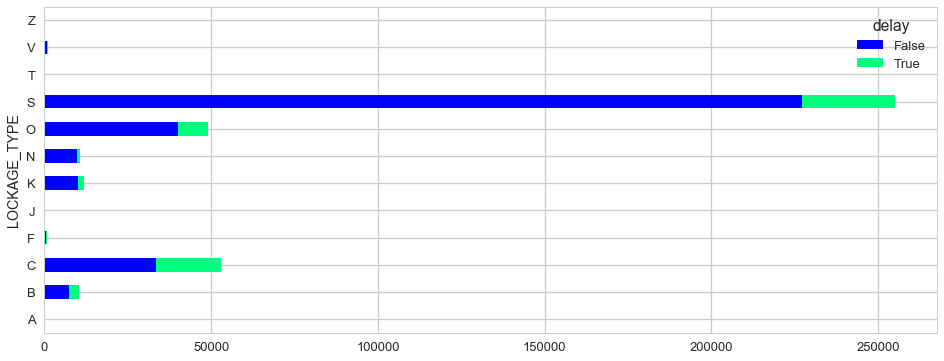

In [30]:
# Plot delay/no delay by Lockage Type
count_delays_by_lockage.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [31]:
# Locks are identified by combo of EROC, RIVER_CODE, LOCK_NO
traf_sample[['EROC', 'RIVER_CODE','LOCK_NO']].nunique()

EROC          23
RIVER_CODE    35
LOCK_NO       53
dtype: int64

In [32]:
# Create a single-column unique identifier for individual locks: E_R_L
traf_sample['E_R_L'] = traf_sample['EROC'] + '_' + traf_sample['RIVER_CODE'] + '_' + traf_sample['LOCK_NO'].astype(str)


In [33]:
# groupby LOCKA_NO to see counts by lock number: group_by_LOCK_NO
group_by_LOCK_NO = traf_sample.groupby(['E_R_L', 'delay'])

In [34]:
# view categories by size and unstack by LOCK_NO
delays_lock_no = group_by_LOCK_NO.size().unstack()

In [35]:
# calculate percent of lockage events that are 'delays' (>110min)
prop_by_lock_no = pd.DataFrame(traf_sample.groupby('E_R_L')['delay'].apply(lambda x: np.sum(x)/len(x)))

# Join count_delays_by_lock_no with prop_by_lock_no, view highest proportion of delays first
prop_lock_no = delays_lock_no.join(prop_by_lock_no)
prop_lock_no.sort_values(by=['delay'], ascending=False, inplace=True)
prop_lock_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, B2_GI_3 to K7_FR_1
Data columns (total 3 columns):
False    186 non-null float64
True     164 non-null float64
delay    186 non-null float64
dtypes: float64(3)
memory usage: 5.8+ KB


In [36]:
# examine the top 10 delayed locks
prop_lock_no.head(10)

False    True     delay
E_R_L                             
B2_GI_3    725.0  4540.0  0.862298
H3_TN_1    420.0  2555.0  0.858824
B2_GI_4   2453.0  3407.0  0.581399
B2_GI_1   2010.0  2234.0  0.526390
B3_MI_25  1246.0  1276.0  0.505948
K7_FR_2      1.0     1.0  0.500000
B5_MI_22  1263.0  1225.0  0.492363
B5_IL_5   1371.0  1143.0  0.454654
B5_MI_20  1546.0  1044.0  0.403089
B3_MI_24  1575.0  1017.0  0.392361

## Explore patterns in delay count by year, month, day

In [37]:
# Remove all 'delay' = False rows: only_delay
only_delay = traf_sample.query('delay != False')
only_delay.head()

EROC RIVER_CODE  LOCK_NO  CHMBR_NO    OPS_ID LOCKAGE_TYPE   VESSEL_NO  \
42951     M3         GI       13         1  L7726276            O  2891807192   
1763583   B2         GI        4         1  L6449717            S  1738273732   
1763314   B2         GI        4         1  L6475971            S  3020701214   
527413    B2         GI        8         1  L7514042            S  1815299047   
30278     M3         GI       14         1  L7904556            O   853921802   

        VESSEL_FUNCTION_TYPE FLOTILLA_NO        ARRIVAL_DATE    ...     \
42951                      T    L4722167 2017-07-13 15:06:00    ...      
1763583                    T    L3950462 2015-07-24 03:41:00    ...      
1763314                    T    L3963416 2015-08-03 09:33:00    ...      
527413                     T    L4598081 2017-03-25 14:08:00    ...      
30278                      T    L4814978 2017-10-08 04:18:00    ...      

        NUM_CMRCL_PASSGRS ASST_CODE SIGNAL_DATE DEPARTURE_DATE LINE_SEQ_NO  \
42951                 NaN       NaN         NaT            NaT      605929   
1763583               NaN       NaN         NaT            NaT      927674   
1763314               NaN       NaN         NaT            NaT       12767   
527413                NaN       NaN         NaT            NaT      836439   
30278                 NaN       NaN         NaT            NaT      216755   

         entry_time exit_time delay_time delay     E_R_L  
42951           NaN       NaN      157.0  True  M3_GI_13  
1763583         5.0       4.0      437.0  True   B2_GI_4  
1763314        10.0      10.0      649.0  True   B2_GI_4  
527413          2.0       4.0      263.0  True   B2_GI_8  
30278           NaN       NaN      191.0  True  M3_GI_14  

[5 rows x 25 columns]

In [38]:
# Explore delays per year
group_year = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="Y")) 
count_delays_by_year = group_year.size()
count_delays_by_year

ARRIVAL_DATE
2013-12-31     9066
2014-12-31    12241
2015-12-31    13078
2016-12-31    13802
2017-12-31    14216
Freq: A-DEC, dtype: int64

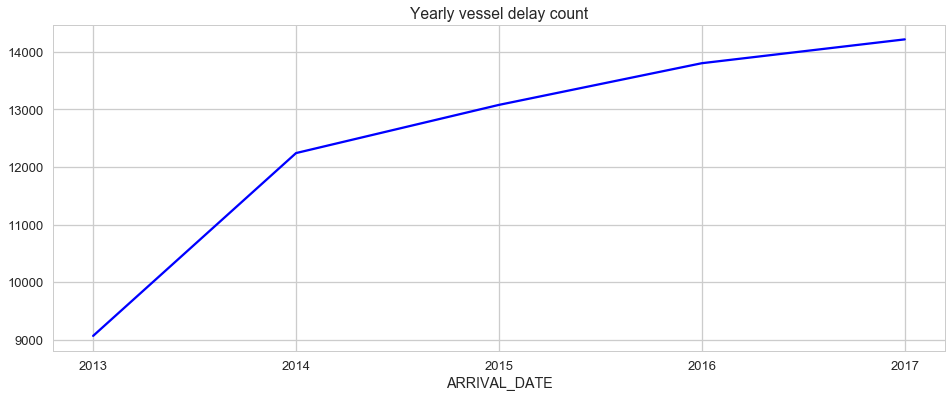

In [39]:
# Plot count of delayed vessels by year
count_delays_by_year.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Yearly vessel delay count')

In [40]:
# Explore delays per month
group_month = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="M")) 
count_delays_by_month = group_month.size()

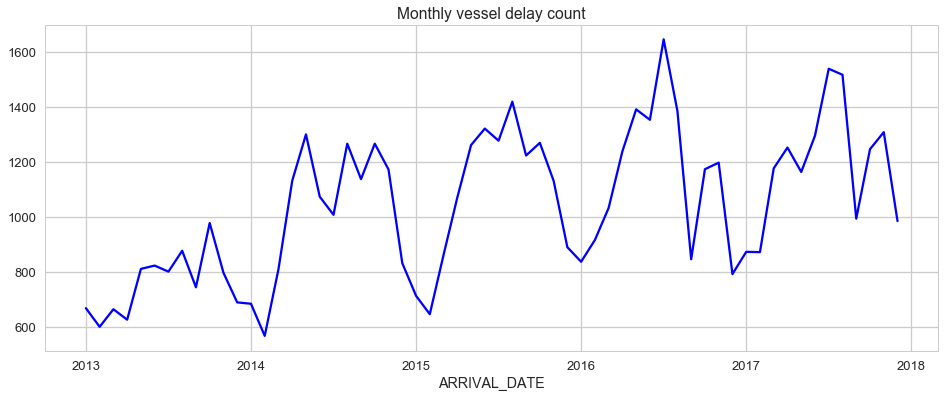

In [41]:
# Plot count of delayed vessels by month
count_delays_by_month.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Monthly vessel delay count')

In [42]:
# Explore delays per day
group_day = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="D")) 
count_delays_by_day = group_day.size()

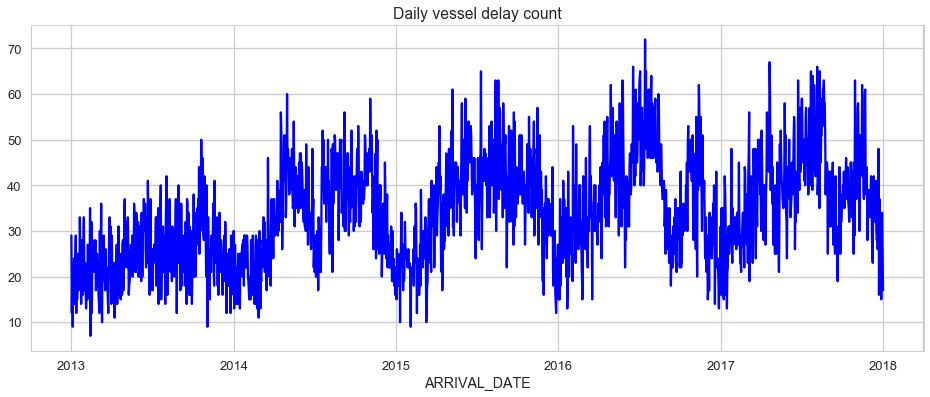

In [43]:
# Plot count of delayed vessels by day
count_delays_by_day.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Daily vessel delay count')

## 3.  Examine delays per lock & per day

In [44]:
# Split 'ARRIVAL_DATE' into date and time columns
traf_sample['YYMMDD'] = traf_sample['ARRIVAL_DATE'].dt.date
traf_sample['hhmmss'] = traf_sample['ARRIVAL_DATE'].dt.time

In [45]:
traf_sample.head()

EROC RIVER_CODE  LOCK_NO  CHMBR_NO    OPS_ID LOCKAGE_TYPE   VESSEL_NO  \
2093451   H2         OH       75         2  L5608584            S  2246973225   
5791      M5         MK       22         1  L7532719            C   967995540   
1234536   M3         GI       14         1  L6150873            O  3171419219   
1391794   H4         MN       25         1  L6581479            S  2064406338   
638365    M3         GI       13         1  L7255211            O  1088709797   

        VESSEL_FUNCTION_TYPE FLOTILLA_NO        ARRIVAL_DATE    ...     \
2093451                    T    L3435504 2014-05-07 05:37:00    ...      
5791                       T    L4611089 2017-04-06 00:40:00    ...      
1234536                    T    L3767838 2015-02-10 20:00:00    ...      
1391794                    T    L4017674 2015-09-20 02:20:00    ...      
638365                     T    L4420842 2016-10-01 01:08:00    ...      

        SIGNAL_DATE DEPARTURE_DATE LINE_SEQ_NO entry_time exit_time  \
2093451         NaT            NaT      821558       10.0      14.0   
5791            NaT            NaT      912730       30.0       8.0   
1234536         NaT            NaT      838438        NaN       NaN   
1391794         NaT            NaT      362970       10.0       5.0   
638365          NaT            NaT      810510        NaN       NaN   

         delay_time  delay     E_R_L      YYMMDD    hhmmss  
2093451        10.0  False  H2_OH_75  2014-05-07  05:37:00  
5791            0.0  False  M5_MK_22  2017-04-06  00:40:00  
1234536        66.0  False  M3_GI_14  2015-02-10  20:00:00  
1391794        20.0  False  H4_MN_25  2015-09-20  02:20:00  
638365         67.0  False  M3_GI_13  2016-10-01  01:08:00  

[5 rows x 27 columns]

In [46]:
# Group by lock and day with count of delay (true/false)
lock_year = pd.DataFrame(traf_sample.groupby(['EROC', 'RIVER_CODE','LOCK_NO','YYMMDD', 'delay'])['delay'].count())

In [47]:
# turn 'delay' index into a column
lock_year.rename(columns={'delay':'count'}, inplace=True)
lock_year.reset_index(level='delay',inplace=True) 
lock_year.head()

delay  count
EROC RIVER_CODE LOCK_NO YYMMDD                  
B2   AT         11      2013-01-01  False      2
                        2013-01-04  False      2
                        2013-01-06  False      1
                        2013-01-07  False      1
                        2013-01-08  False      1

In [48]:
# pickle modified traf_sample
traf_sample.to_pickle('traf_sample_updated.pickle')

In [49]:
# pickle dataframe with only delay rows
no_zero_delay.to_pickle('no_zero_delay.pickle')

## Based on EDA of delay_time per vessel I determined that 'delay' must be defined per lock. Each lock has different factors (age, lockage type, river traffic) that affects the normal lockage time. A delay of 110 minutes on the Hudson may be extreme while a delay of that length at the Industrial Canal in New Orleans is very common (80% of vessles take that long or longer). 

## The Inner Harbor Navigation Canal Lock (in New Orleans) was built in 1920 and has had some repairs but is a slowdown for several reasons: 

"the 1920s vintage lock has become a bottleneck between the nation's two highest-tonnage waterways—the Mississippi and the Gulf Intracoastal Waterway."

"...three different waterways—the Industrial Canal, the Intracoastal and the MRGO—were now using the same lock to connect to the river."

From: https://en.wikipedia.org/wiki/Industrial_Canal_Lock